# Patient type prediction step-by-step walkthrough

First, we do an EDA(Exploratory data analysis) of the patient dataset using pandas library

In [3]:
import pandas as pd

In [78]:
patient_two = pd.read_csv(r'data\train\two_classes.csv')

Eyeball the dataset to draw high level inferences on the dataset

In [5]:
patient_two

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


#### High level EDA
1. Dataset contains 310 rows and 7 columns, there are 6 features and one taregt class.
2. Six features seems to be observations of Orthopedic diagnostics of patients.
3. All features are numerical thus feature encoding is not required

Analyze the distribution of target column

In [6]:
patient_two['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Two classes of target variable i.e. Patient Type is observed and both have a fair share. Classes are not under-represented.

Analyze feature type

In [24]:
patient_two.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

Features are all numeric. 

Analyeze feature distribution

In [208]:
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

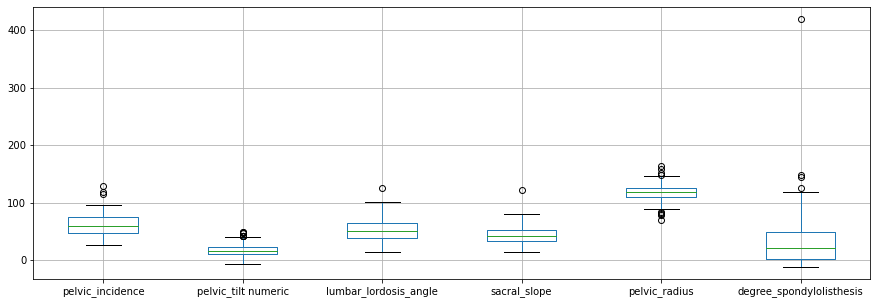

In [293]:
features.boxplot(figsize=(15,5))

All features have high outliers. Also, pelvic_tilt numeric and pelvic_radius has both lower and higher outliers.
Outliers can impact patient type classification, thus needs to be treated. 

First, model is built without dropping outliers to set a vanilla benchmark.

Since each feature is in varying scale they are scaled before feeding to the model.

#### Split dataset into train and test before applying Scaling to avoid data leak. 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [284]:
#Seggregate the dataset into features and target column. Encode the target labels into numeric using LabelEncoders
df_modelling = patient_two[:280]
df_production = patient_two[280:310]
features = df_modelling.drop('class', axis=1)
target=df_modelling['class']
le = LabelEncoder()
le.fit(target)
target = le.transform(target)
x_train,x_test,y_train,y_test=train_test_split(features,target, test_size=0.25)

In [282]:
df_modelling.shape

(280, 7)

In [177]:
#Import KNN Classifer 
from sklearn.neighbors import KNeighborsClassifier

In [307]:
# Use Robust Scaler which uses the quartile values for scaling data 
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaler = robust_scaler.fit(features)
X = scaler.transform(features)
x_train,x_test,y_train,y_test=train_test_split(X,target, test_size=0.25)

In [308]:
#Trian model with scaled data
for x in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=x)
    knn_model.fit(x_train,y_train)
    y_pred = knn_model.predict(x_test)
    if x==1:
        acc=({x:knn_model.score(x_test, y_test)})
    else:
        acc.update({x:knn_model.score(x_test, y_test)})

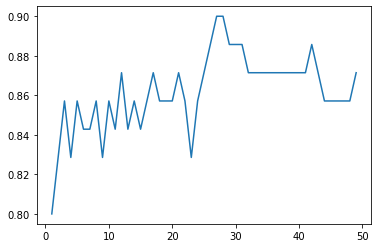

In [309]:
plt.figure()
plt.plot(*zip(*sorted(acc.items())))

In [315]:
#Use the held out set and form X and Y
x_prod = df_production.drop('class', axis=1)
y_prod = df_production['class']
le = LabelEncoder()
y_prod = le.fit_transform(y_prod)

# Transform features with same transform which was fit during model training
x_prod = robust_scaler.transform(x_prod)

#Build model with Number of Neighbors which resulted in highest score when modelling
knn_model = KNeighborsClassifier(n_neighbors=27)
knn_model.fit(x_train,y_train)

y_pred = knn_model.predict(x_prod)
print("Model score on Production Data: {}".format(knn_model.score(x_prod, y_prod)))

Model score on Production Data: 0.5


In [ ]:
# Model score delines on hold out set. 